Module Code: CS3PP19<br/>
Title: Jupyter notebook - Summative Coursework<br/>
Student Number: 26023885<br/>
Date:1/12/19<br/>
Hours spent: 18<br/>
Assignment Evaluation: Data Science, Python, Jupyter<br/>

# CS3PP19 - Summative Coursework

#### Explanation:
A short explanation of the report layout: <br/>
The code is commented. <br/>
Explanations of code are in markdown cells labeled as "Explanation:" such as this one. <br/>
Explanation cells will also contain comments from the code which explain/discuss the result from the corresponding single line of code, they are marked with '#'.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import networkx as nx

## Task 1 - Bike journey data exploratory data analysis

#### Step 1.
Load the *metro.csv* file into a pandas data frame.

In [2]:
metrodata = pd.read_csv('metro.csv')#Importing CSV into Pandas DataFrame
metrodata#Display

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,94851140,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6279,30,One Way,Monthly Pass
1,94851141,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6518,365,One Way,Flex Pass
2,94851138,15,2018-07-01 00:09:00,2018-07-01 00:24:00,4147,34.145248,-118.150070,4174,34.165291,-118.150970,4823,365,One Way,Monthly Pass
3,94851137,7,2018-07-01 00:22:00,2018-07-01 00:29:00,4157,34.140999,-118.132088,4162,34.147499,-118.148010,6115,30,One Way,Monthly Pass
4,94851136,35,2018-07-01 00:23:00,2018-07-01 00:58:00,3013,33.779819,-118.263023,3013,33.779819,-118.263023,12055,1,Round Trip,Walk-up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95278,106412141,30,2018-09-30 23:47:00,2018-10-01 00:17:00,3038,34.046822,-118.248352,3038,34.046822,-118.248352,6258,1,Round Trip,Walk-up
95279,106411454,10,2018-09-30 23:52:00,2018-10-01 00:02:00,3035,34.048401,-118.260948,3074,34.044170,-118.261169,5931,30,One Way,Monthly Pass
95280,106411455,11,2018-09-30 23:52:00,2018-10-01 00:03:00,3024,34.057720,-118.248970,3055,34.044159,-118.251579,6100,30,One Way,Monthly Pass
95281,106411453,9,2018-09-30 23:54:00,2018-10-01 00:03:00,3008,34.046612,-118.262733,3052,34.051102,-118.264557,5879,1,One Way,Walk-up


#### Step 2.
Find a sensible way to remove the missing values from the data frame, and explain why you have chosen this method.

#### Explanation: 
First, to find these missing values

In [3]:
####Find missing values by going through each column
for i in metrodata.columns:#For all columns
    if metrodata[i].isnull().values.any():#if there are any null values
        print(i, metrodata[i].isnull().values.sum())#Print the column name

start_lat 559
start_lon 559
end_lat 1838
end_lon 1838


#### Explanation:
Running above code finds Missing Data in: start_lat, start_lon, end_lat, end_lon and how many: 559, 559 for start(lat & lon) and 1838, 1838 end(lat & lon). This is most likely GPS errors of some sort in the system<br/><br/>
Next, removing the missing values. 
Need to find the start_lat & lon and end_lat & lon entries, if they are all part of the same 1838 entries then removing 1838 from the total 95283 entires is insignicant (2% of data). If the missing values are spread out thorugh the table then a maximum of 4794 entires could be affected which is 5% of the data.

In [4]:
display((metrodata[metrodata.start_lat.isnull()]['trip_id'] == metrodata[metrodata.start_lon.isnull()]['trip_id']).value_counts())
#So all entries with missing start_lat are the same entries with missing start_lon as expected, these values go together
display((metrodata[metrodata.end_lat.isnull()]['trip_id'] == metrodata[metrodata.end_lon.isnull()]['trip_id']).value_counts())
#Same with the end_lat and end_lon
display(metrodata[metrodata.end_lat.isnull()].start_lat.isnull().value_counts())
#Missing End and start entries have 313 entries in common so will only be removing 2,084 entires in total which is 2.2% of data 


True    559
Name: trip_id, dtype: int64

True    1838
Name: trip_id, dtype: int64

False    1525
True      313
Name: start_lat, dtype: int64

#### Explanation: 
#So all entries with missing start_lat are the same entries with missing start_lon as expected, these values go together<br/><br/>
#Same with the end_lat and end_lon<br/><br/>
#Missing End and start entries have 313 entries in common so will only be removing 2,084 entires in total which is 2.2% of data<br/><br/>
Replacing missing values with the mean value would not make sense since these are geographical locations and I would only get a location that doesn't make much sense. Replacing missing values with most common geographical location could be sensible and best option if I am to keep the data. However, for this scenario, this missing data was probably obtained using GPS. Bad GPS signal could happen in rural areas so it would be wrong to assume and replace the missing values with a location that is most common (the modal value) since these are most likely cities. So I will remove the data so that I will be working with real data and this not drastically affecting the outcome and any conclusions gathered from the data.<br/><br/>
Next, the removal of row entries with missing values/NA.

In [5]:
metrodata = metrodata.dropna()
metrodata #Results in 93,199 rows as expected

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,94851140,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6279,30,One Way,Monthly Pass
1,94851141,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6518,365,One Way,Flex Pass
2,94851138,15,2018-07-01 00:09:00,2018-07-01 00:24:00,4147,34.145248,-118.150070,4174,34.165291,-118.150970,4823,365,One Way,Monthly Pass
3,94851137,7,2018-07-01 00:22:00,2018-07-01 00:29:00,4157,34.140999,-118.132088,4162,34.147499,-118.148010,6115,30,One Way,Monthly Pass
4,94851136,35,2018-07-01 00:23:00,2018-07-01 00:58:00,3013,33.779819,-118.263023,3013,33.779819,-118.263023,12055,1,Round Trip,Walk-up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95278,106412141,30,2018-09-30 23:47:00,2018-10-01 00:17:00,3038,34.046822,-118.248352,3038,34.046822,-118.248352,6258,1,Round Trip,Walk-up
95279,106411454,10,2018-09-30 23:52:00,2018-10-01 00:02:00,3035,34.048401,-118.260948,3074,34.044170,-118.261169,5931,30,One Way,Monthly Pass
95280,106411455,11,2018-09-30 23:52:00,2018-10-01 00:03:00,3024,34.057720,-118.248970,3055,34.044159,-118.251579,6100,30,One Way,Monthly Pass
95281,106411453,9,2018-09-30 23:54:00,2018-10-01 00:03:00,3008,34.046612,-118.262733,3052,34.051102,-118.264557,5879,1,One Way,Walk-up


#### Setp 3.
Explore the distribution of the duration variable. You should produce a plot visualising the distribution, and calculate and discuss briefly statistics of the variable.

count    93199.000000
mean        39.150903
std        106.635812
min          1.000000
25%          7.000000
50%         14.000000
75%         33.000000
max       1440.000000
Name: duration, dtype: float64

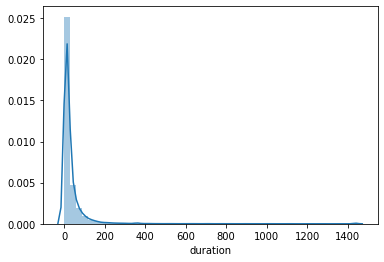

In [6]:
display(sns.distplot(metrodata.duration)) #It seems there are some anomolies in the data. Some duration time is unreasonably long
display(metrodata.duration.describe())# Max duration is 1400 min (23.33 Hours) which is very unrealistic, there are also very short 1 minute journey durations which is unlikely

#### Explanation:

#It seems there are some anomolies in the data. Some duration time is unreasonably long

#Max duration is 1400 min (23.33 Hours) which is very unrealistic, there are also very short 1 minute journey durations which is unlikely

The other values seem reasonable such as the mean and the quartiles but are skewed because of the annomolies. (No mention in the task sheet about removing/excluding the annomolies at this stage so I have decided to keep them and filter them where relevant/necessary)

#### Step 4.
Produce a plot showing how the *distribution* of duration relates to passholder type

Walk-up         44076
Monthly Pass    43102
One Day Pass     4445
Flex Pass        1566
Annual Pass        10
Name: passholder_type, dtype: int64

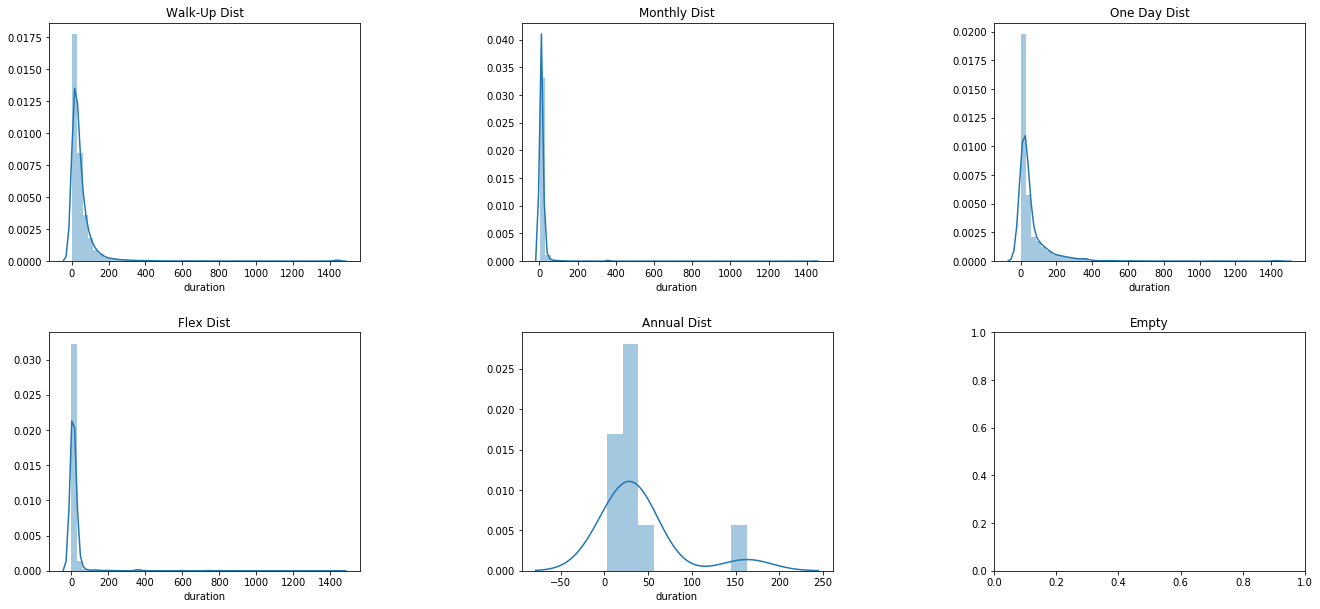

In [7]:
display(metrodata.passholder_type.value_counts())# Get list of available values and how many
fig, axes = plt.subplots(2, 3)
fig.tight_layout()
plt.subplots_adjust(top=2, right=3)
sns.distplot(metrodata[metrodata.passholder_type == 'Walk-up'].duration, ax=axes[0,0])
axes[0,0].title.set_text('Walk-Up Dist')
sns.distplot(metrodata[metrodata.passholder_type == 'Monthly Pass'].duration, ax=axes[0,1])
axes[0,1].title.set_text('Monthly Dist')
sns.distplot(metrodata[metrodata.passholder_type == 'One Day Pass'].duration, ax=axes[0,2])
axes[0,2].title.set_text('One Day Dist')
sns.distplot(metrodata[metrodata.passholder_type == 'Flex Pass'].duration, ax=axes[1,0])
axes[1,0].title.set_text('Flex Dist')
sns.distplot(metrodata[metrodata.passholder_type == 'Annual Pass'].duration, ax=axes[1,1])
axes[1,1].title.set_text('Annual Dist')
axes[1,2].title.set_text('Empty')
#Note last subplot will be empty, no data

#### Explanations:
It seems all passholder types have some very long, duration time annomolies except for annual which is expected since it is a smaller dataset therefore has less chance of containing an error. Though the graphs are squashed, we can still see the peak density and the spread of the values for each passholder. Monthly Pass has the highest peak density, this shows that there is little spread in the duration of these users, this is statisticially significant since it the 2nd most used pass type meaning that the majority of users have durations close to the mean value. In comparison, walk-up has a wider spread even though it has the most users, this means that these users have a larger variety in the differnt durations on their bike. In the walk-up data, the data tails off around the 300 minute (5 hour) mark. One Day pass have a longer tail compared to walk-up, though I do not have any information on the cost of these passes, a possible explanation could be that people expecting to go on longer journeys find One Day Passes cheaper in comparison to Walk-up hence more people going on longer journeys than walk-up. The One Day pass durations tail off at around the 400 minute (6.7 hour) mark. Flex pass has the 2nd lowest number of users and graphs spead shows that most user's duration fall in a similar, narrow range.
Overall, in all graphs the majority of journey durations are in the shorter times.

#### Step 5.
Perform an appropriate statistical test to check if the mean duration is different between *One Day Pass* and *Flex Pass* passholders. What assumptions have you made by using this test?

In [8]:
#Quick test
print('Unfiltered means:')
display(metrodata[metrodata.passholder_type == 'One Day Pass'].duration.mean())
display(metrodata[metrodata.passholder_type == 'Flex Pass'].duration.mean()) 

print('Filtered mean:')
holdx = metrodata[(metrodata.passholder_type == 'One Day Pass')]
holdx = holdx[(holdx.duration > 1) & (holdx.duration < 180)]
display(holdx.duration.mean())
holdx = 0#Clear
holdx = metrodata[(metrodata.passholder_type == 'Flex Pass')]
holdx = holdx[(holdx.duration > 1) & (holdx.duration < 180)]
display(holdx.duration.mean())
#NOTE the changes are not permanent

Unfiltered means:


66.51878515185602

18.56257982120051

Filtered mean:


38.87075

12.47871643745907

#### Explanations:
Looking at the unfiltered means, we can concluded means are different, there are annomolies however that skew the mean as mentioned before (and as seen in the density graphs in the previous code cell).
Since annomolies skew the mean, they will be filtered out for the next mean comparison. We can assume that a bike journey should not take more than 3 hours. This is roughly 45 miles if the bike speed was 15mph (an average bike journey and bike speed as found here: https://www.road-bike.co.uk/articles/average-speed.php). A bike journey should also last more than 1 minute. This assumption is still on the rather extreme side but better/more realistic than the anomolies.

We can confirm that Flex Pass users have shorter ride duration than One Day Pass users. The anomolies also considerably skew the data as evident when comparing the unfiltered and filtered means.

#### Step 6.
Convert the start_time and end_time columns to date objects if they are not already.

In [9]:
#metrodata['start_time'] = pd.to_datetime(metrodata['start_time'])
#metrodata['end_time'] = pd.to_datetime(metrodata['end_time'])
#These give warnings so...
#metrodata.loc[:, 'start_time'] = pd.to_datetime(metrodata.loc[:, 'start_time'])
#metrodata.loc[:, 'end_time'] = pd.to_datetime(metrodata.loc[:, 'end_time'])
#metrodata['start_time'].dt.hour#Warnings are gone, Test if it works
#The code does work and if there are problems further on then I will fix it by making a copy of the table first, then doing .to_datetime
#There were more warnings when making new column step 7, need a copy of table
mdCOPY = metrodata.copy()
mdCOPY['start_time'] = pd.to_datetime(mdCOPY['start_time'])
mdCOPY['end_time'] = pd.to_datetime(mdCOPY['end_time'])
mdCOPY['start_time'].dt.hour#Test, works and no errors in step 7

0         0
1         0
2         0
3         0
4         0
         ..
95278    23
95279    23
95280    23
95281    23
95282    23
Name: start_time, Length: 93199, dtype: int64

#### Explanations:
The original code was trying to add the new columns to the original pandas dataframe, is produced warnings in this step and made it not possible to do step 7 so a copy of the dataframe was made with the added columns as required.

#### Step 7.
Create a new column in the data frame that gives the hour of the day that each journey started on.

In [10]:
mdCOPY['start_hour'] = mdCOPY['start_time'].dt.hour#Just create this new column
mdCOPY.head()#And show to see if added

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_hour
0,94851140,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6279,30,One Way,Monthly Pass,0
1,94851141,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6518,365,One Way,Flex Pass,0
2,94851138,15,2018-07-01 00:09:00,2018-07-01 00:24:00,4147,34.145248,-118.150070,4174,34.165291,-118.150970,4823,365,One Way,Monthly Pass,0
3,94851137,7,2018-07-01 00:22:00,2018-07-01 00:29:00,4157,34.140999,-118.132088,4162,34.147499,-118.148010,6115,30,One Way,Monthly Pass,0
4,94851136,35,2018-07-01 00:23:00,2018-07-01 00:58:00,3013,33.779819,-118.263023,3013,33.779819,-118.263023,12055,1,Round Trip,Walk-up,0


#### Step 8.
Explore how the duration variable varies between each journey starting hour of the day, create a plot to visualise this.

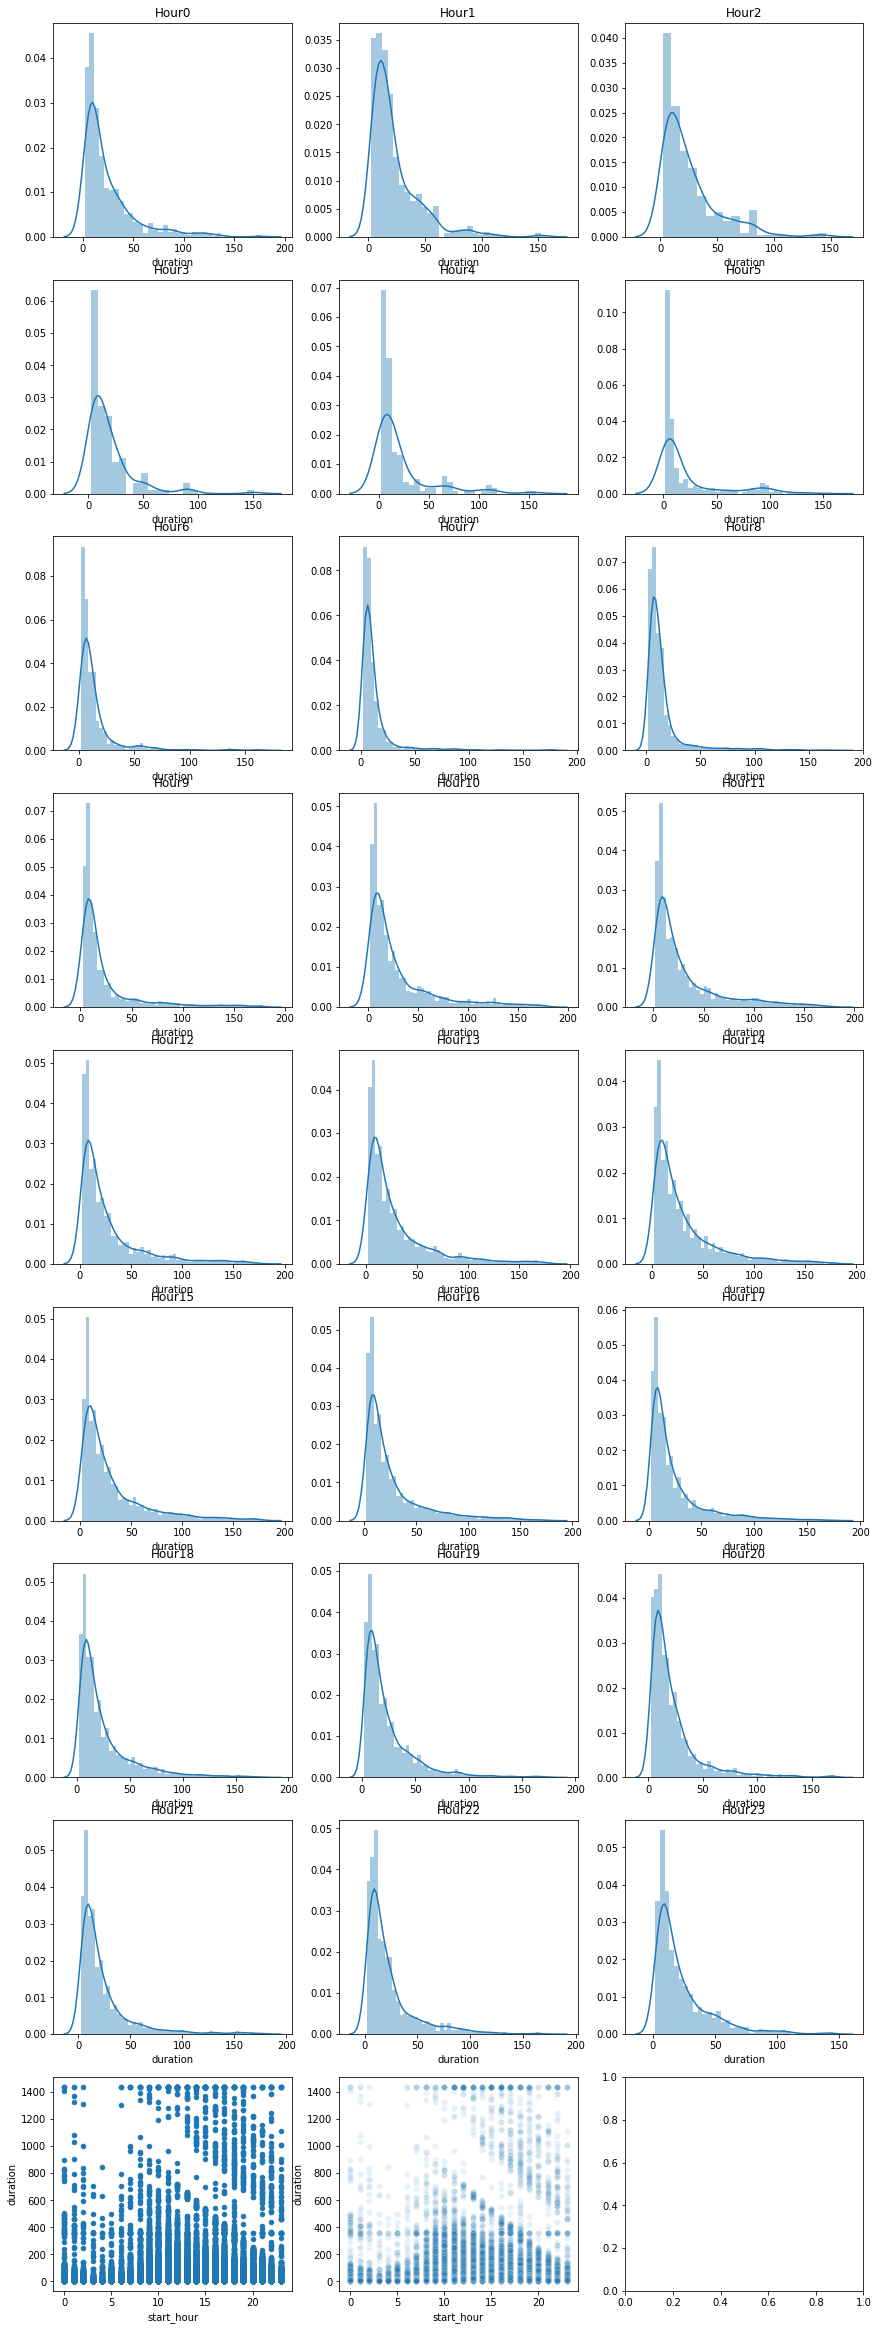

In [11]:
#Part 1
#Again I will filter out anomolies just like step 6 to produce better plots
fig, axes = plt.subplots(9, 3)
plt.subplots_adjust(top=8, right=2)
holdx = mdCOPY[(mdCOPY.duration > 1) & (mdCOPY.duration < 180)]#Filter
#see the histogram + distribution of how duration changes on each starting hour of day and see the differences between them
for itm in mdCOPY.start_hour.unique():#For all hours, make seperate dist plot
    sns.distplot(holdx[holdx['start_hour'] == itm].duration, ax=axes[int(itm/3),itm%3])
    axes[int(itm/3),itm%3].title.set_text(('Hour' + str(itm)))
#All the plots look similar, with most bike ride durations being short and the longer ones are less frequent.

#Next plot includes anomolies
mdCOPY.plot(kind='scatter', x='start_hour', y='duration', ax=axes[8,0])
#Extra
sns.scatterplot(x='start_hour', y='duration', data=mdCOPY, alpha=0.1, ax=axes[8,1])
#This plot fades out the anomolies and shows the curve in the data much better
#Dist plots together is in next code cell 

#### Explanations:
#Again I will filter out anomolies just like step 6 to produce better plots

All the plots look similar, with most bike ride durations being short and the longer ones are less frequent. Overall the changes between the different hours corresponds to events thoughout a day such as during morning work rush, lunch breaks and evenings. As expected there isn't much activity very early morning. 

The scatter plot, though not a great plot, the trend can be seen where there is low usage in the early morning, this increases rapidly to peak at around 8 or 9 and then steadily decrease for the rest of the day. There also seems to be a possible trend in the anomolies as can be seen by the top right corner. There is a right angled triangle. The anomolies could be increasing during over the day. This could be an issue with the system or maybe an issue realted to people being too tired when using the system or bikestations having the wrong date and time in their systems, since this data is from the USA, there could possibly be incorrect time zone information in the systems but the bikes should all be in Los Angeles. Another explanation is maybe the bikes are abandond after use.

The final scatter plot is the same but with the alpha channel turned on

#This plot fades out the anomolies and shows the curve in the data much better
 
this gives a better view of the shape of the data, there are also concentrations of anomolies found at the top of the graph for times from 10:00 - 20:00.

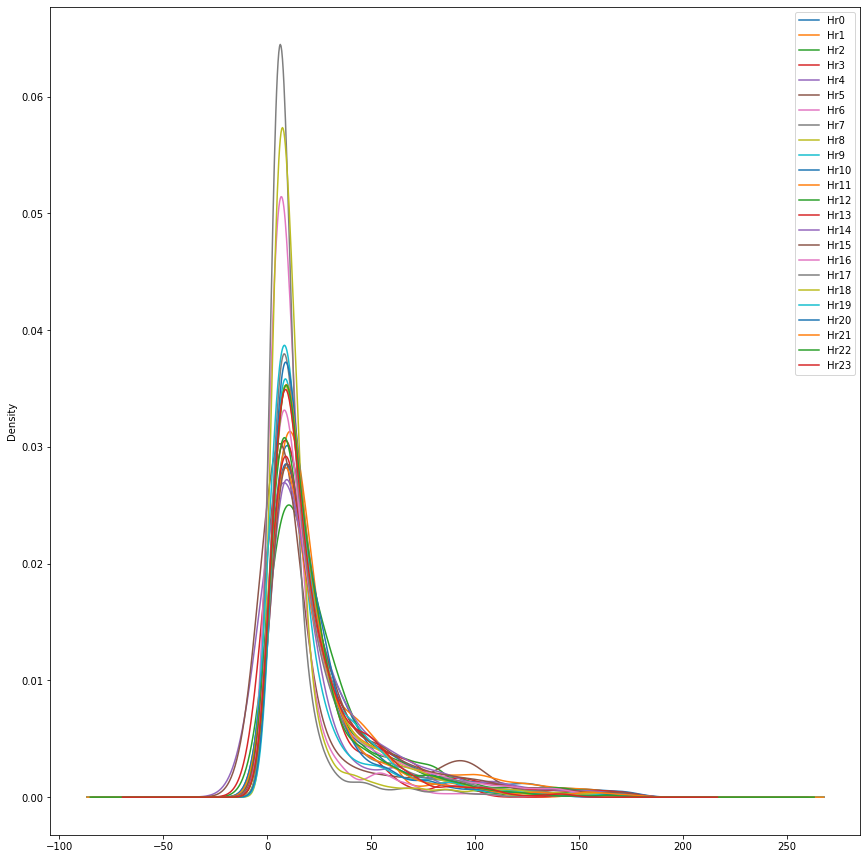

In [12]:
#All the Distribution plots on one for comparison
fig, ax = plt.subplots()
plt.subplots_adjust(top=3, right=2)
for itm in mdCOPY.start_hour.unique():
    holdx[holdx['start_hour'] == itm].duration.plot(kind='kde', label=("Hr" + str(itm)))#holdx carried over from last section (Step 8. part 1)
leg = ax.legend()

#### Explanations:
As seen from the graph, for all hours the density peeks around the same duration, so they have similar means, but they tail off at different rates. It is much more visible here than the previous collection of graphs that Hours 7 and 8 have the highest densities. Users have similar journeys during this time.

#### Step 9.
Explore how the distribution of the duration variable varies between each day of the week, creating a plot to visualise this.

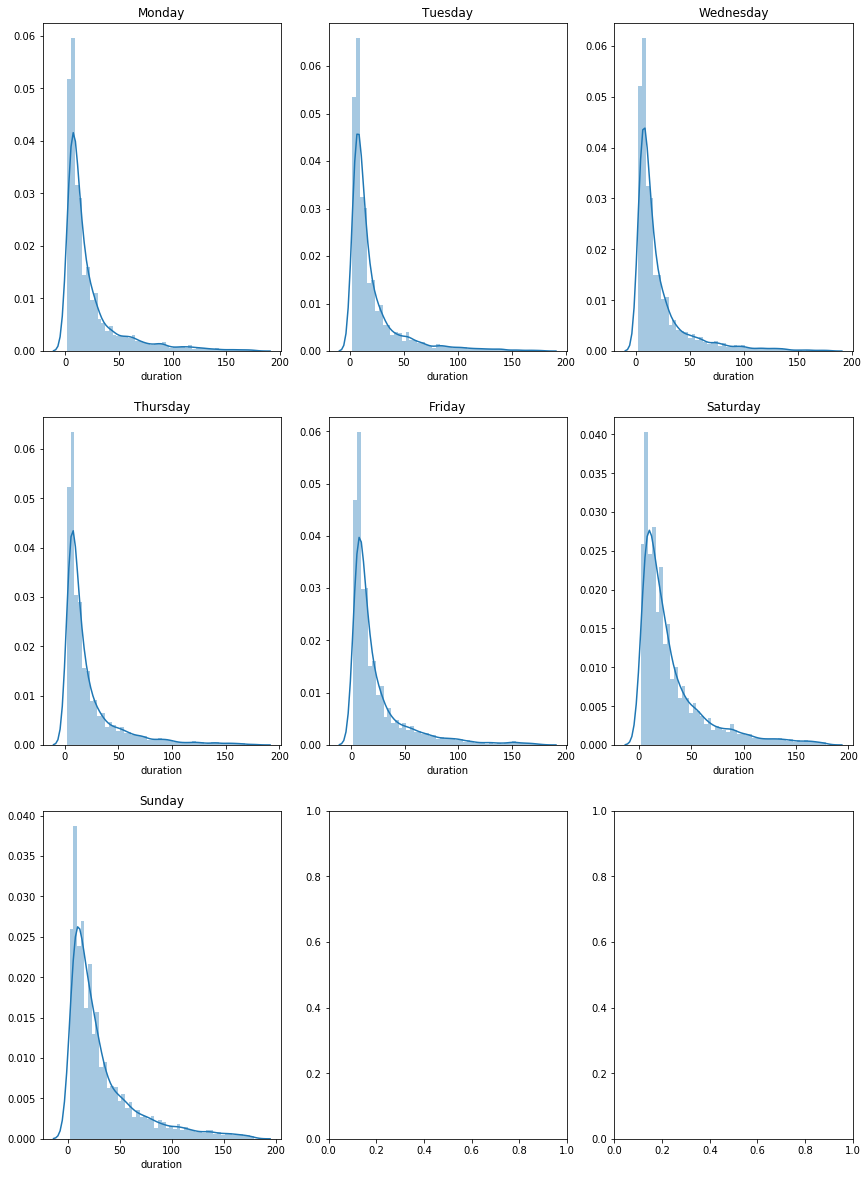

In [13]:
fig, axes = plt.subplots(3, 3)
plt.subplots_adjust(top=4, right=2)
holdx = mdCOPY[(mdCOPY.duration > 1) & (mdCOPY.duration < 180)]#Filter
for itm in holdx.start_time.dt.dayofweek.unique():
    sns.distplot(holdx[holdx.start_time.dt.dayofweek == itm].duration, ax=axes[int(itm/3),itm%3])
axes[0,0].title.set_text('Monday')
axes[0,1].title.set_text('Tuesday')
axes[0,2].title.set_text('Wednesday')
axes[1,0].title.set_text('Thursday')
axes[1,1].title.set_text('Friday')
axes[1,2].title.set_text('Saturday')
axes[2,0].title.set_text('Sunday')

#### Explanations:
Again, the plots all have a similar shape and it will probably be more interesting to see the plots together in a single plot
A plot together is in the next code cell.

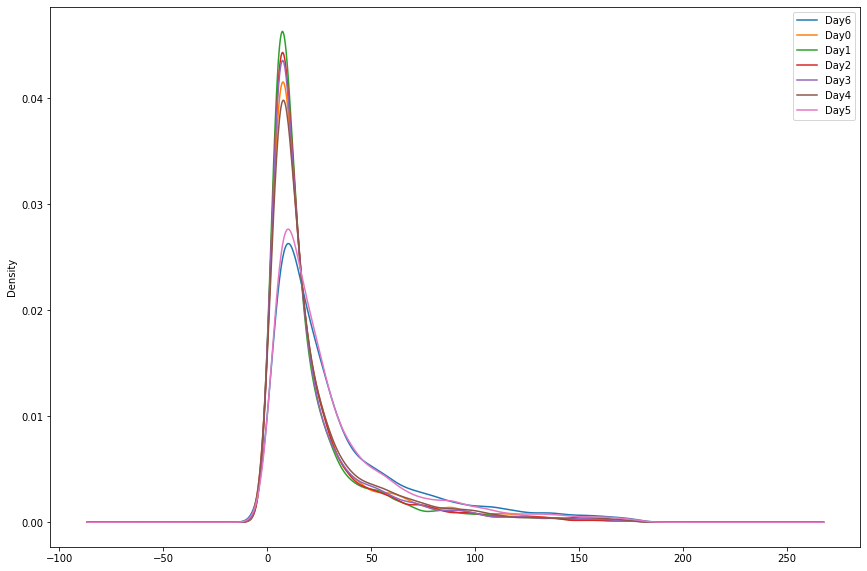

In [14]:
#Together, decided to make it in another box so see differences better
fig, ax = plt.subplots()
plt.subplots_adjust(top=2, right=2)
holdx = mdCOPY[(mdCOPY.duration > 1) & (mdCOPY.duration < 180)]#Filter
for itm in holdx.start_time.dt.dayofweek.unique():
    holdx[holdx.start_time.dt.dayofweek == itm].duration.plot(kind="kde", label=("Day" + str(itm)))#Holdx
leg = ax.legend()

#### Explanations:
As seen in the graph, day 5 and 6 (the weekends) have a lower peak density, this is because there are more longer bike rides when compared to the weekdays, therefore stretching the distribution in the x axis(i.e. slower drop in the tail). The highest peak density is Tuesday, there are a lot of short rides on tuesday.

#### Step 10.
Calculate the Total numbers of passholders of each type travelling on each week day. Discuss the results.

Day 6


Walk-up         8653
Monthly Pass    4125
One Day Pass    1115
Flex Pass        198
Annual Pass        1
Name: passholder_type, dtype: int64

Day 0


Monthly Pass    6818
Walk-up         5235
One Day Pass     538
Flex Pass        216
Name: passholder_type, dtype: int64

Day 1


Monthly Pass    7313
Walk-up         4960
One Day Pass     447
Flex Pass        235
Name: passholder_type, dtype: int64

Day 2


Monthly Pass    6958
Walk-up         5236
One Day Pass     566
Flex Pass        234
Name: passholder_type, dtype: int64

Day 3


Monthly Pass    7150
Walk-up         5432
One Day Pass     404
Flex Pass        244
Name: passholder_type, dtype: int64

Day 4


Monthly Pass    6711
Walk-up         6161
One Day Pass     530
Flex Pass        262
Name: passholder_type, dtype: int64

Day 5


Walk-up         8399
Monthly Pass    4027
One Day Pass     845
Flex Pass        177
Annual Pass        9
Name: passholder_type, dtype: int64

Text(0.5, 1, 'Number of Passholder types on each week day')

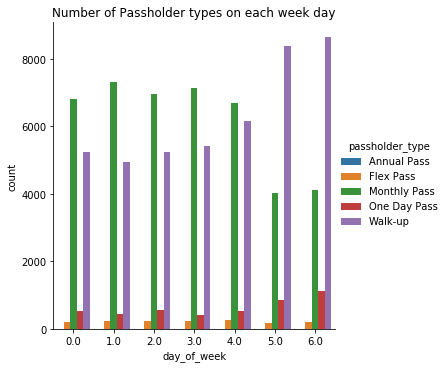

In [15]:
#Non-filtered: assumption is that people did use the bike, only the times are most likley wrong so no filtering need for this part
for itm in mdCOPY.start_time.dt.dayofweek.unique():
    print("Day", itm)
    display(mdCOPY[mdCOPY.start_time.dt.dayofweek == itm].passholder_type.value_counts())

##Individual Bar plots - unfinished
#Not as intresting as grouped plot
#for itm in mdCOPY.start_time.dt.dayofweek.unique():
#    mdCOPY[mdCOPY.start_time.dt.dayofweek == itm].passholder_type.value_counts().sort_index.plot(kind="bar")#Sort by index so that its easier to compare

##Grouped Bar plot ##INPROGRESS
#mdtemp = mdCOPY.copy()
#mdtemp['day_of_week'] = mdtemp.start_time.dt.dayofweek
#mdtemp = mdtemp.melt(id_vars =['day_of_week'], value_vars =['passholder_type'])
#del mdtemp['variable']
#mdtemp = mdtemp.groupby('day_of_week')
#mdtemp.value.value_counts()
##Above is not Good enough for group plot

#Reconstruct mdtemp by hand, need to double check since things can easily go wrong, must be an easier way but cant figure it out
mdtemp = pd.DataFrame()
tempArrayDoW = np.array([])
tempArrayPT = np.array([])
for itm in range(mdCOPY.passholder_type.unique().size):
    tempArrayDoW = np.append(tempArrayDoW, [0,1,2,3,4,5,6])#Add to day_of_week to array as many times there are passholder_types
for itm in range(mdCOPY.start_time.dt.dayofweek.unique().size):
    tempArrayPT = np.append(tempArrayPT, ['Walk-up','Monthly Pass','One Day Pass','Flex Pass','Annual Pass'])#Same but for passholder type
mdtemp['day_of_week'] = pd.Series(tempArrayDoW)
mdtemp['passholder_type'] = pd.Series(tempArrayPT)
mdtemp = mdtemp.sort_values(by=['day_of_week', 'passholder_type'])#Sorted by week number and alphabetical pass type
completeSeries = pd.Series([])
for itm in np.sort(mdCOPY.start_time.dt.dayofweek.unique()):#Sorted to start from week day 0 and end week day 6
    seriestemp = mdCOPY[mdCOPY.start_time.dt.dayofweek == itm].passholder_type.value_counts()
    if seriestemp.get('Annual Pass') == None:#Only weekends have Annual Pass and its missing from the others so will be filled in as 0
        seriestemp = seriestemp.append(pd.Series([0], index=['Annual Pass']))
    seriestemp = seriestemp.sort_index()
    completeSeries = completeSeries.append(seriestemp)
#Checked completeSeries matches with the calculated values from before
mdtemp = mdtemp.reset_index(drop=True)#Remove the existing index and re index it (index is in wrong order after the sorting)
mdtemp['count'] = pd.Series(completeSeries.values)#Fix index to match mdtemp, not using passholder as index, using numbers instead
#Checked mdtemp and is as expected
#Now for group bar plot
sns.catplot(x="day_of_week", y="count", data=mdtemp, kind="bar", hue="passholder_type")
plt.title("Number of Passholder types on each week day")

#### Explanations:
The results have been calculated but it would be more interesting to visualise in a barchart. It will allow for easier comparison.

The grouped bar plot shows that monthly pass uses usually use bikes on weekdays (possibly for work, since weekend usage drops). One-Day Pass and more noticeably, Walk-ups, increase during the weekend and this is most likely for leisure activities. Flex Pass have a slight drop during the weekends like the Monthly pass though to a lesser degree. Annual pass contributes very little to the data since there are only 10 but they are only on weekends and almost all are saturdays. Overall, these results are somewhat to be expected, they fit within real life routines.

## Task 2 - Seed Shape data

In [16]:
seedData = pd.read_csv('seeds.csv')##Reading in the data to pandas data frame
seedData

,area,perimeter,compactness,length,width,asymmetry,groove length
0,15.26,14.84,0.871,5.763,3.312,2.221,5.220
1,14.88,14.57,0.881,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.895,5.324,3.379,2.259,4.805
4,16.14,14.99,0.903,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.878,5.137,2.981,3.631,4.870
206,11.23,12.88,0.851,5.140,2.795,4.325,5.003
207,13.20,13.66,0.888,5.236,3.232,8.315,5.056
208,11.84,13.21,0.852,5.175,2.836,3.598,5.044


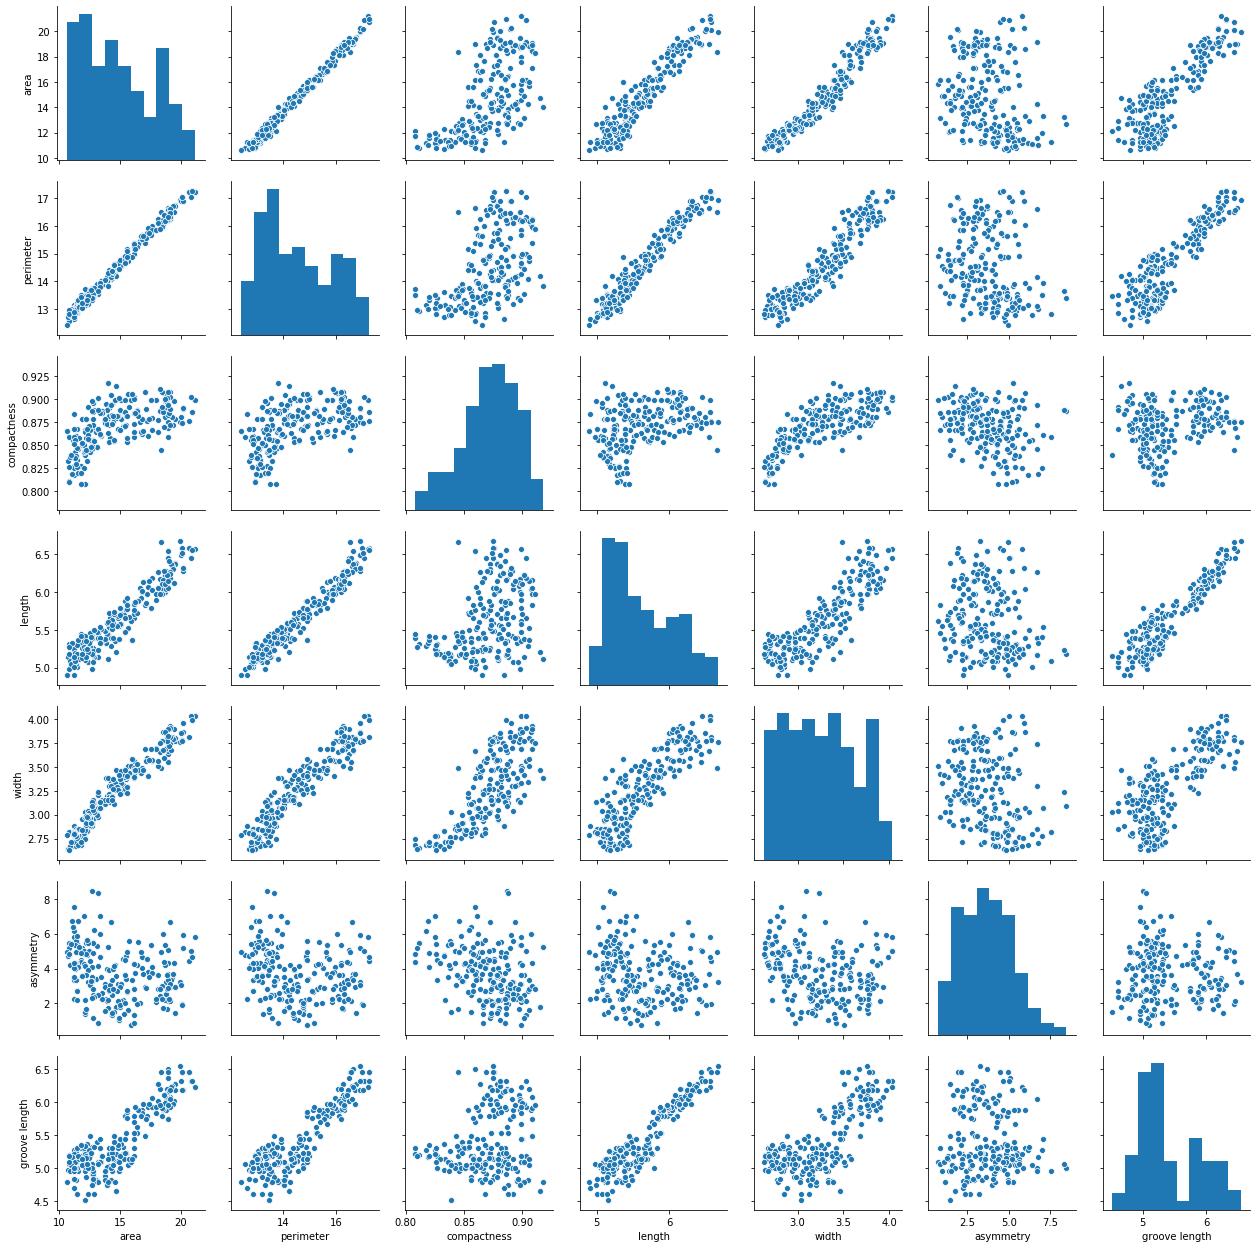

In [17]:
##Exploring the Data
sns.pairplot(seedData)

#### Explanations:
There doesn't seem to be any overly extreme anomolies when looking at the data. There doesn't seem to be any sort of obvious clustering of data. The Groove length plots in general has more cluster like features. Groove Length and compactness are the only two with slightly noticable clustering so I will choose this pair for modelling the cluster.
Looking at the Groove Length Histogram in the pair plot, it also seems to have a more interesting Distribution with two peaks (i.e. indicating *possible* clustering)

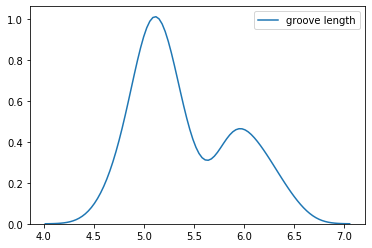

In [18]:
sns.kdeplot(data=seedData['groove length'])

#### Explanations:
Proof in the KDE Graph above, seems to be two clusters because of the two peaks. In this Jupyter report, we will focus on Groove-length and Compactness since it visually seems to have good clustering of the data and also seems to be more spread out rather than a straight line. Straight lines can be modelled using a line of best fit/regression line.

Text(0.5, 1.0, 'BIC (groove length-compactness) - Graph')

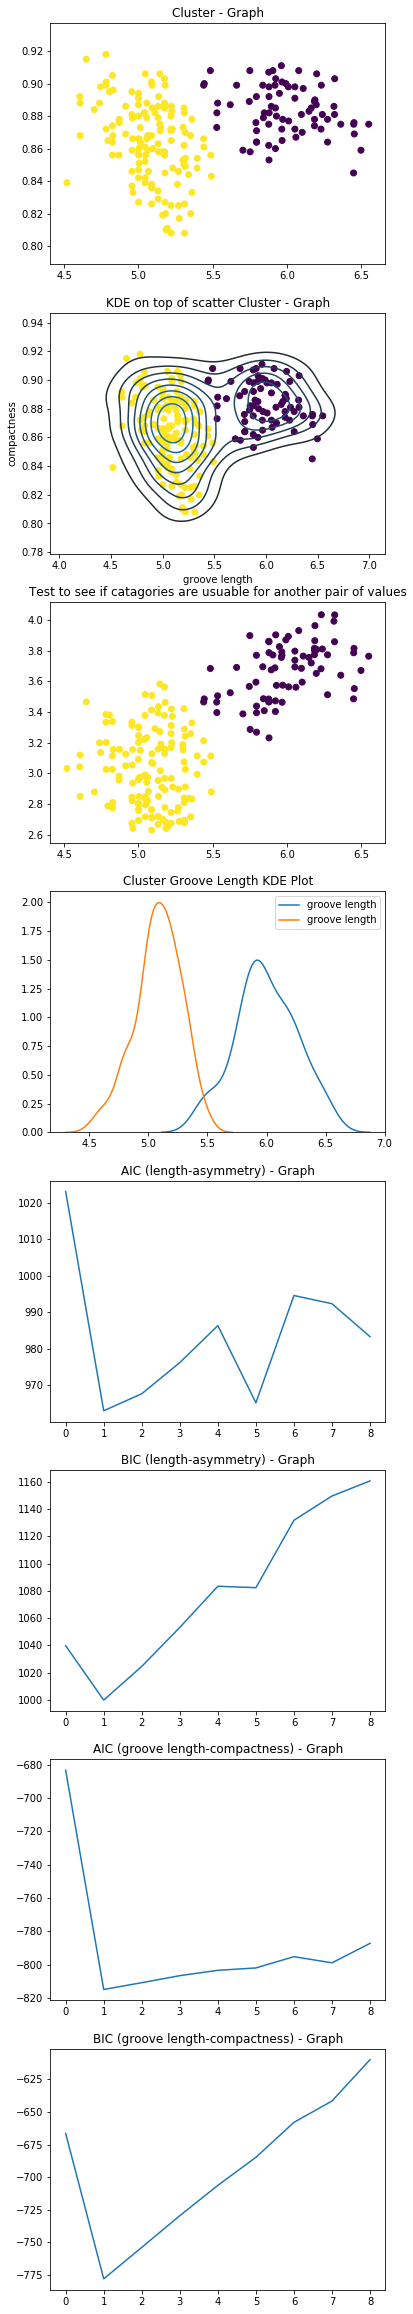

In [19]:
plt.subplots_adjust(top=9)
#Experimenting with Cluster functions
mixturemodel = GaussianMixture(2)
mixturemodel.fit(seedData[['groove length','compactness']])
labels = mixturemodel.predict(seedData[['groove length','compactness']])
plt.subplot(9,1,1)
plt.scatter(seedData['groove length'], seedData['compactness'], c=labels)
plt.title('Cluster - Graph')
plt.subplot(9,1,2)
plt.scatter(seedData['groove length'], seedData['compactness'], c=labels)
sns.kdeplot(data=seedData['groove length'], data2=seedData['compactness'])#Also KDE on top #Turn ON/OFF
plt.title('KDE on top of scatter Cluster - Graph')
#It has clustered the data pretty well, increasing the number of clusters doesn't produce good results.
plt.subplot(9,1,3)
plt.scatter(seedData['groove length'], seedData['width'], c=labels)
plt.title('Test to see if catagories are usuable for another pair of values')
#Correctly clustered groove-length and width using the same labels from groove-length and compactness
#KDE for plot
plt.subplot(9,1,4)
sdTemp = seedData.copy()
sdTemp['label'] = labels
sns.kdeplot(sdTemp[sdTemp['label'] == 0]['groove length'])
sns.kdeplot(sdTemp[sdTemp['label'] == 1]['groove length'])
plt.title("Cluster Groove Length KDE Plot")
#The two plots together have a similar shape to the original groove lengths KDE so it seems to be a good cluster. The plot is a little warped
#This could be because since the KDE plot is using smaller subsections of the overall data then the data has more influence on the KDE
#shape.
###Finding the best fit for the model using AIC and BIC
#For this experiement I've decided to first see if AIC and BIC applied to a value pair that was more varied and had no clear clusters
model_aicLA = []
model_bicLA = []
for k in range(1,10):
    mixturemodel = GaussianMixture(k)
    mixturemodel.fit(seedData[['length','asymmetry']])#Decided to look at a more vaired pair of values
    model_aicLA.append(mixturemodel.aic(seedData[['length','asymmetry']]))
    model_bicLA.append(mixturemodel.bic(seedData[['length','asymmetry']]))
plt.subplot(9,1,5)
plt.plot(model_aicLA)
plt.title('AIC (length-asymmetry) - Graph')
plt.subplot(9,1,6)
plt.plot(model_bicLA)
plt.title('BIC (length-asymmetry) - Graph')
#AIC an BIC both confirm that clustering is not occuring between the two values
#Will do the same to the original groove-length and compactness to see if 2 was a good choice, it seems good when looking at the KDE
model_aicGC = [] #Reset
model_bicGC = [] #Reset
for k in range(1,10):
    mixturemodel = GaussianMixture(k)
    mixturemodel.fit(seedData[['groove length','compactness']])#Decided to look at a more vaired pair of values
    model_aicGC.append(mixturemodel.aic(seedData[['groove length','compactness']]))
    model_bicGC.append(mixturemodel.bic(seedData[['groove length','compactness']]))
plt.subplot(9,1,7)
plt.plot(model_aicGC)
plt.title('AIC (groove length-compactness) - Graph')
plt.subplot(9,1,8)
plt.plot(model_bicGC)
plt.title('BIC (groove length-compactness) - Graph')
#2 was not a good choice, 1 seems to be the best according to AIC and BIC.
#Looking at the original scatter graph, it makes sense, the cluster is very faint. Need to look at other value pairs.

#### Explanations:
**First 2 graphs:**
#It has clustered the data pretty well, increasing the number of clusters doesn't produce good results.

The 2D KDE is a nice addition since it you can visually see the 2D peaks and how the clusters have been made near those peaks.

**3rd plot:**
#Correctly clustered groove-length and width using the same labels from groove-length and compactness

**KDE Plot:**
#The two plots together have a similar shape to the original groove lengths KDE so it seems to be a good cluster. The plot is a little warped. This could be because since the KDE plot is using smaller subsections of the overall data then the data has more influence on the KDE shape.

**AIC and BIC:**

AIC and BIC help measure the relative fit of the Gaussian predicted cluster models. Using these values we want to find the Gaussian model with the smallest AIC and BIC values. This will help find the best cluster model that fits the data.

#For this experiement I've decided to first see if AIC and BIC applied to a value pair that was more varied and had no clear clusters.

#AIC an BIC both confirm that clustering is not occuring between the two values. #Will do the same to the original groove-length and compactness to see if 2 was a good choice, it seems good when looking at the KDE

**AIC and BIC for groove length and compactness:**
#clustering of 2 was not a good choice, 1 seems to be the best according to AIC and BIC. #Looking at the original scatter graph, it makes sense, the cluster is very faint. Need to look at other value pairs.

Overall these experiments haven't provided much in terms of the clustering so I will have to look at other pair values.

Text(0.5, 1.0, 'BIC (groove length-area) - Graph')

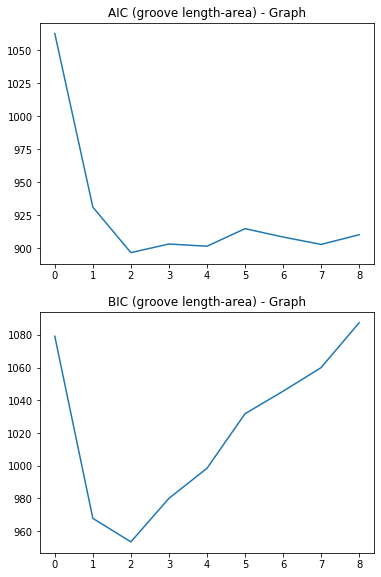

In [20]:
#Looking for other Pairs
plt.subplots_adjust(top=10)
#Here I will test other pair value AIC and BIC to see if a better cluster is made
#Groovelength - Area
model_aicGA = [] #Reset
model_bicGA = [] #Reset
for k in range(1,10):
    mixturemodel = GaussianMixture(k)
    mixturemodel.fit(seedData[['groove length','area']])#Decided to look at a more vaired pair of values
    model_aicGA.append(mixturemodel.aic(seedData[['groove length','area']]))
    model_bicGA.append(mixturemodel.bic(seedData[['groove length','area']]))
plt.subplot(10,1,1)
plt.plot(model_aicGA)
plt.title('AIC (groove length-area) - Graph')
plt.subplot(10,1,2)
plt.plot(model_bicGA)
plt.title('BIC (groove length-area) - Graph')

#### Explanations:
#Looking for other Pairs. #Here I will test other pair value AIC and BIC to see if a better cluster is made.

I have run this code multiple times and it give different results for AIC and BIC, this is most likely due to the sci-kit learn GaussianMixture Function since it is "learning" and therefore it hasn't been consistent with its clustering decisions. I have also run the previous code cells but the results vary very little and AIC and BIC are always 1. With this pair of values the AIC and BIC vary from 1-4. I must check with other pair values to find a more consistent result.

Text(0.5, 1.0, 'BIC (groove length-width) - Graph')

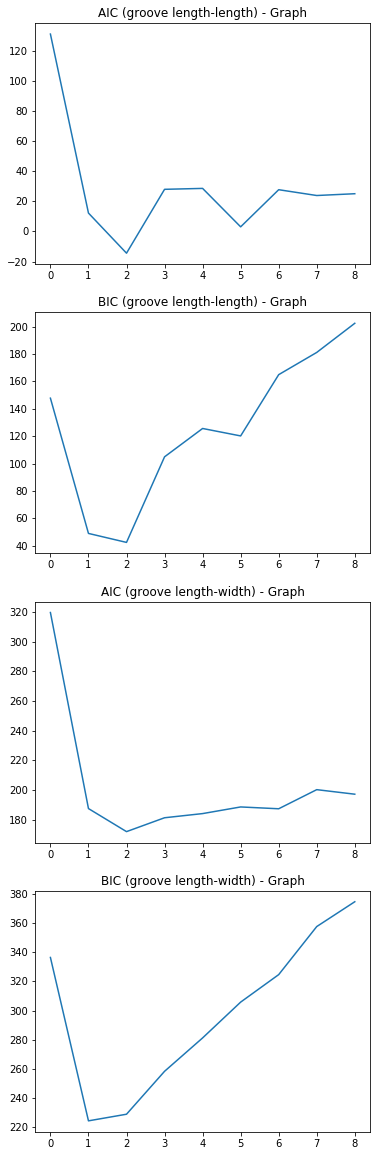

In [21]:
plt.subplots_adjust(top=10)
#Groove length - length
model_aicGL = [] #Reset
model_bicGL = [] #Reset
for k in range(1,10):
    mixturemodel = GaussianMixture(k)
    mixturemodel.fit(seedData[['groove length','length']])#Decided to look at a more vaired pair of values
    model_aicGL.append(mixturemodel.aic(seedData[['groove length','length']]))
    model_bicGL.append(mixturemodel.bic(seedData[['groove length','length']]))
plt.subplot(10,1,3)
plt.plot(model_aicGL)
plt.title('AIC (groove length-length) - Graph')
plt.subplot(10,1,4)
plt.plot(model_bicGL)
plt.title('BIC (groove length-length) - Graph')
#This pair of values are often getting 2 as the best number of clusters

#Groove - Length - width
model_aicGW = [] #Reset
model_bicGW = [] #Reset
for k in range(1,10):
    mixturemodel = GaussianMixture(k)
    mixturemodel.fit(seedData[['groove length','width']])#Decided to look at a more vaired pair of values
    model_aicGW.append(mixturemodel.aic(seedData[['groove length','width']]))
    model_bicGW.append(mixturemodel.bic(seedData[['groove length','width']]))
plt.subplot(10,1,5)
plt.plot(model_aicGW)
plt.title('AIC (groove length-width) - Graph')
plt.subplot(10,1,6)
plt.plot(model_bicGW)
plt.title('BIC (groove length-width) - Graph')
#Lots of varience just like groove length-area: best number of clusters is from 1-4

#### Explanations:
In this section I have looked at the AIC and BIC of groove-length - length and groove-length - with. Groove-length and length gave the most consistent result wich was an optimal clustering of 2. For the groove-length and width, it is the same as the previous experiments with AIC and BIC ranging between 1-4.

Text(0.5, 1.0, 'BIC (compactness-perimeter) - Graph')

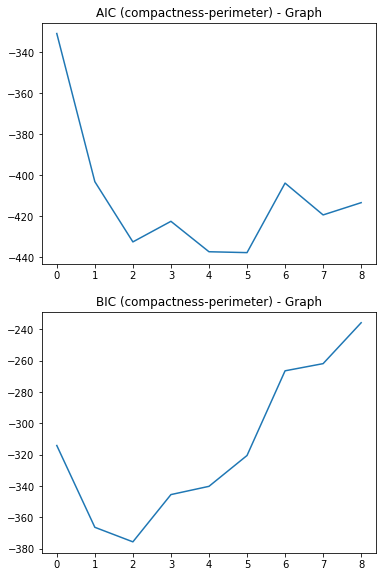

In [22]:
plt.subplots_adjust(top=10)
#Compactness - perimeter (changing the groove length value to see if there is a difference)
model_aic = [] #Reset
model_bic = [] #Reset
for k in range(1,10):
    mixturemodel = GaussianMixture(k)
    mixturemodel.fit(seedData[['compactness','perimeter']])#Decided to look at a more vaired pair of values
    model_aic.append(mixturemodel.aic(seedData[['compactness','perimeter']]))
    model_bic.append(mixturemodel.bic(seedData[['compactness','perimeter']]))
plt.subplot(10,1,1)
plt.plot(model_aic)
plt.title('AIC (compactness-perimeter) - Graph')
plt.subplot(10,1,2)
plt.plot(model_bic)
plt.title('BIC (compactness-perimeter) - Graph')
#BIC is consistently 2 but AIC changes between 2 and 5
#I will go with a cluster size 2 as the best

#### Explanations:

Looking at the compactness and perimeter, #BIC is consistently 2 but AIC changes between 2 and 5. In general BIC has more stronger penalty for complex models compared to AIC so it may be the better option. BIC results in a simpler cluster model. 

In the end I have decided to go with the groove length and length pair values since they are more consistent than other pairs. Compactness and perimeter have confirmed my decision.

Text(0.5, 1.0, '2 Cluster Groove Length KDE Plot')

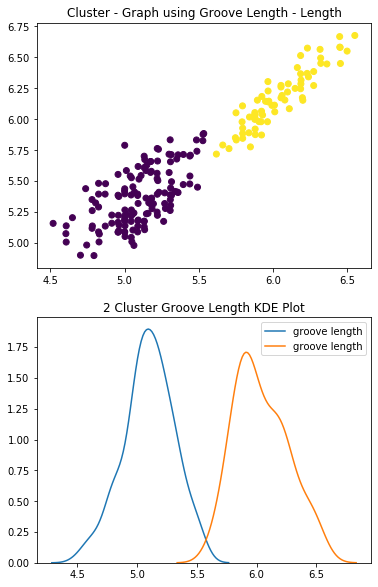

In [23]:
plt.subplots_adjust(top=2)
#Labeled Scatter  using Groove Length - Length
#Using Groove Length and Length since it was the most consistent 2 cluster result
mixturemodel = GaussianMixture(2)
mixturemodel.fit(seedData[['groove length','length']])
labels = mixturemodel.predict(seedData[['groove length','length']])
plt.subplot(2,1,1)
plt.scatter(seedData['groove length'], seedData['length'], c=labels)
plt.title('Cluster - Graph using Groove Length - Length')
#2 cluster seems like the best choice
#KDE for plot
plt.subplot(2,1,2)
sdTemp = seedData.copy()
sdTemp['label'] = labels
for i in range(2):
    sns.kdeplot(sdTemp[sdTemp['label'] == i]['groove length'])
plt.title("2 Cluster Groove Length KDE Plot")
#KDE seems good when compared to original groove length KDE

#### Explanations:
As previously done for groove length and compactness, I have shown the cluster and KDE for the groove-length and length clusters. The model appears to have clusterd very well since there is a clear divide down the middle of the plot.

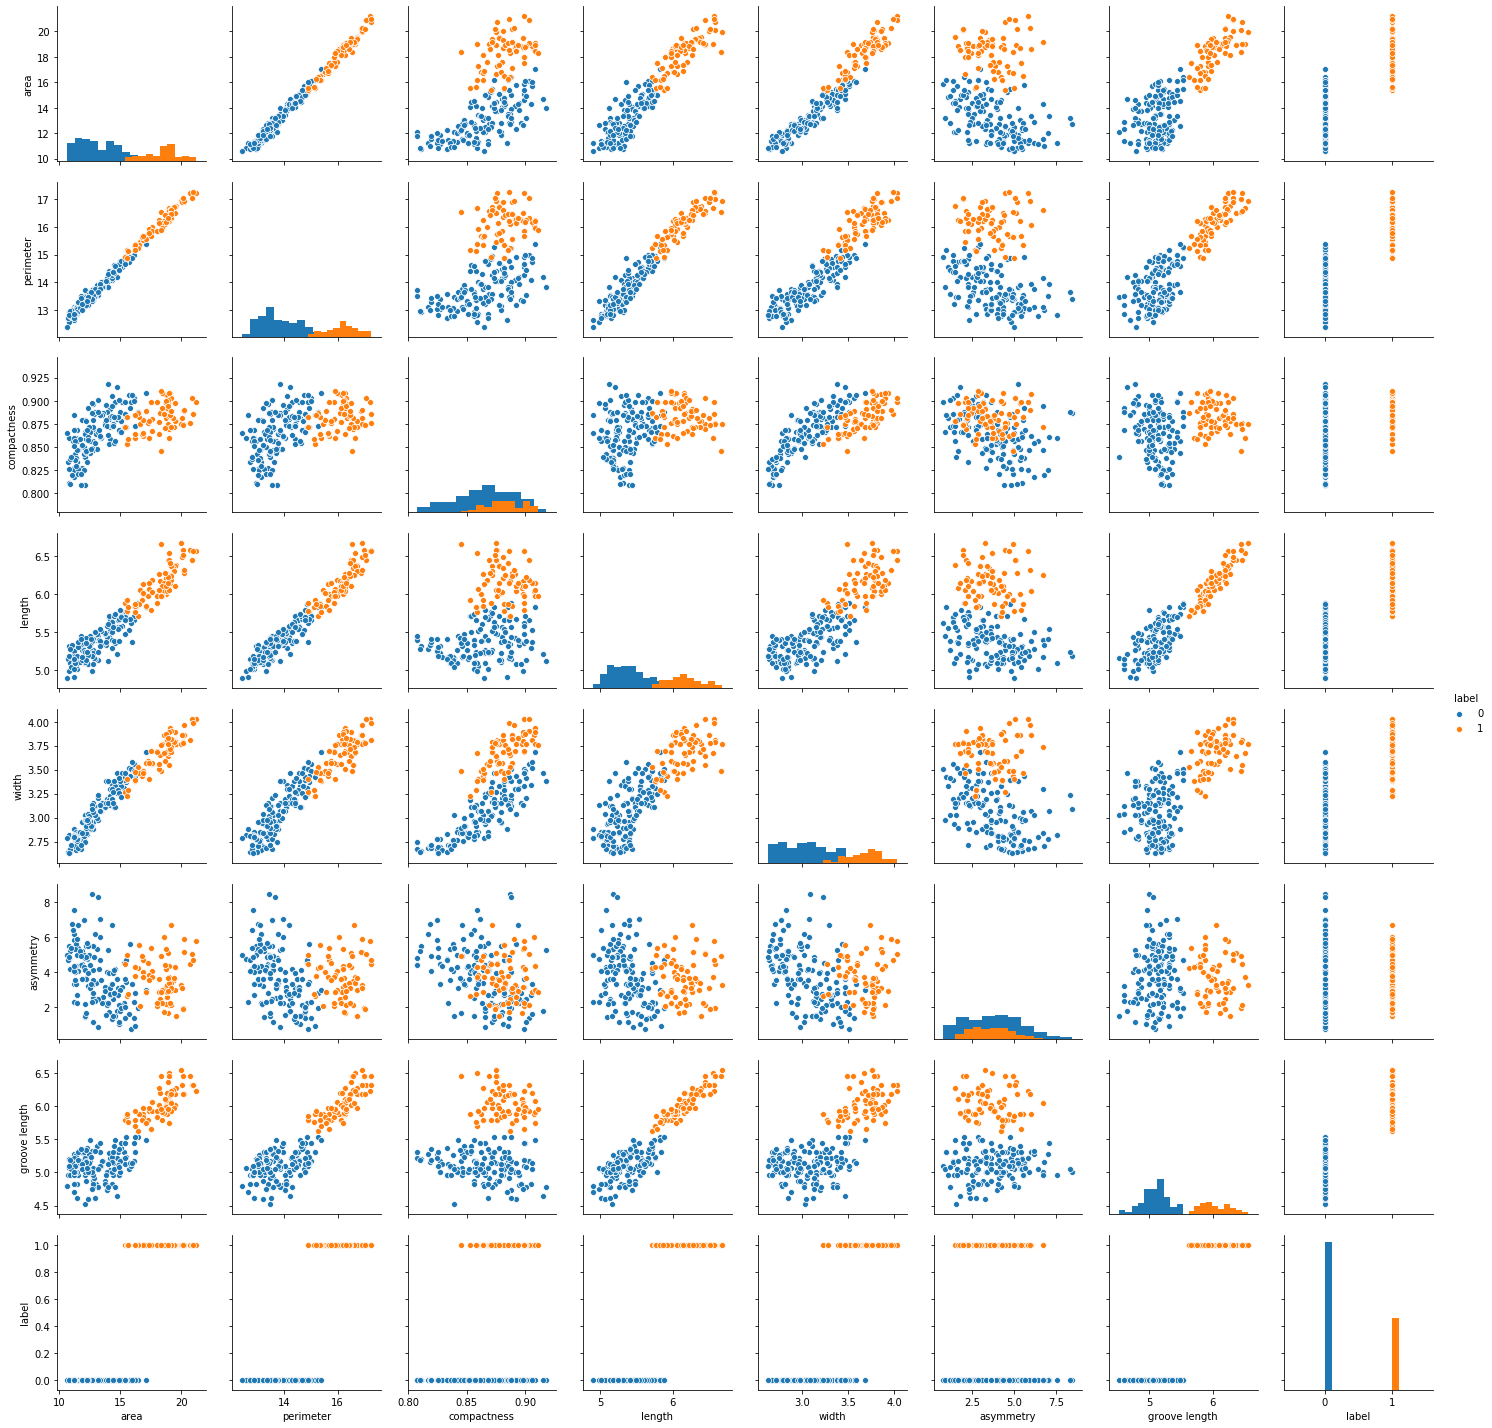

In [24]:
#Now to see if clusters on all other pair plots and if the clustering makes sense
sdcopy = seedData.copy()
sdcopy['label'] = labels
sns.pairplot(sdcopy, hue="label",  diag_kind="hist")

#### Explanations:
As seen before, clustering using the asymmetry values isn't a good idea and its evident here even more than before, there is overlap between the clusters in the result. The Groove length plots are organised into visually the same cluster gorup. Some of the positive correlation graphs such as area-perimeter have split the bottom and top as clusters which makes sense, there is a little overlap in the middle. Overall the outcome is good and I don't think other clusters would be as good. The model is a good fit and can help identify seed catagories.

## Task 3 - Social network analysis

In [25]:
#Load social network data
with open("social-network.csv") as f:
    el = (list(map(int,l.split(','))) for l in f)#Get all lines
    Grph = nx.from_edgelist(el)#Graph constructor
#Grph.number_of_edges()#check to see if equal to Number of lines in txt file (2981)
#Grph.edges()#Check to see if correct edges
#Graph loaded
print('Done')#Computer takes a while so added print to confirm its done

Done


C:\Users\milan\OneDrive\PortaProgs\winpython-zero\python-3.7.4.amd64\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


Done
Done


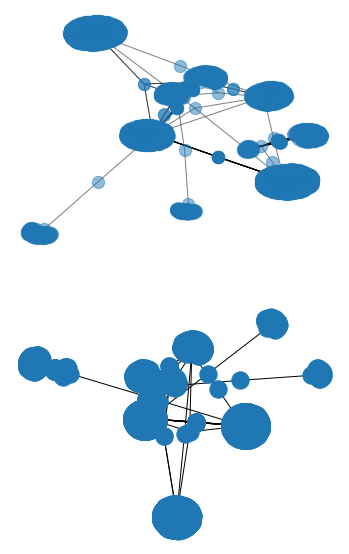

In [26]:
#Graph Visual
plt.subplots_adjust(top=2)
plt.subplot(2,1,1)
layout = nx.spring_layout(Grph)
nx.draw(Grph, pos=layout, node_size=150,alpha=0.5)#Gives Warnings
print('Done')

plt.subplot(2,1,2)
nx.draw_spring(Grph)#Just Another View
print('Done')

#### Explanations:
The first graph has the alpha channel on to show the density of the nodes. The graph has many clusters of nodes and have edges that connect clusters together. Looking at the csv file these clusters are most likley the nodes:1,288,603,710,1525,2232,2536,2687,2699 just by looking at how often these leading node numbers are used in the list of edges. In terms of social media, this clustering of nodes could most likely be famous people or Communities. In comparison other peoples social groups are smaller.

The second graph is another view of the network but there isn't anything visually interesting.

In [27]:
###Calcualte Statistics of the network
#Number of nodes - For Reference
print("Number of Nodes: " + str(Grph.number_of_nodes()))

#Number of Edges - For Reference
print("Number of Edges: " + str(Grph.number_of_edges()))

##Connected Components
print("Number of Connected Components: " + str(nx.number_connected_components(Grph)))

##Diameter - This gives the longest shortest Path in network
print("Diameter: " + str(nx.diameter(Grph)))#Takes a long time

##Shortest Path
#print("Shortest Path: " + str(nx.shortest_path(Grph))) #Not useful but here just incase its needed to find the path between two nodes

#More in next Code Cell - Warnings for crashing because code takes too long to run


Number of Nodes: 2888
Number of Edges: 2981
Number of Connected Components: 1
Diameter: 9


#### Explanations:
The Connected components value shows that every Node is reachable from any starting node (i.e. There are no subgraphs in the network). In terms of the social media scenario it shows that everyone is reable though the "friends of friends of..." approach. There are no isolated friendship groups. Combining this statistic with the result from the degree_histogram (^Note: has been Moved to Next Code Cell), we can see that even having a few friends (i.e. a node with low degree) you will have some relationship, even if distant, to someone else (i.e. any other chosen node).

For the diameter we get a value of 9. The diameter is the largest, shortest path. Though there are lots of nodes and dense clusters, the largest distance between nodes isn't too large. In terms of the social network scenario, this result is similar to the "six degrees of seperation" found from social media statistics as seen here: https://www.theguardian.com/technology/2008/aug/03/internet.email 

Average Clustering Coefficient: 0.027247421431211827
Degree Assortativity Coefficient: -0.6682140067239861
done


Text(0.5, 1.0, 'Random vs Social Network - Degree Assortativity Coefficients')

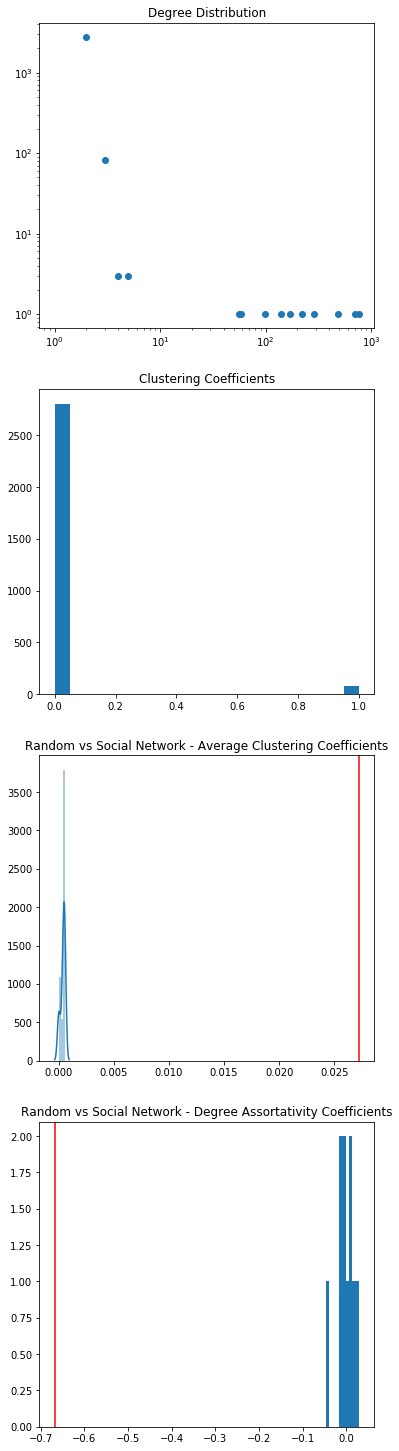

In [28]:
plt.subplots_adjust(top=5)
###Statistics Continued
##Degree Distributions
plt.subplot(4,1,1)
ddist = nx.degree_histogram(Grph)
plt.loglog(range(1,len(ddist)+1),ddist,'o')
plt.title('Degree Distribution')

##Clustering Coefficient
plt.subplot(4,1,2)
cc= nx.clustering(Grph)
plt.hist(list(cc.values()),bins=20)
plt.title('Clustering Coefficients')
#sns.distplot(list(cc.values()))#Can do seaborn and auto Bins but gives small bad graph

##Average Clustering Coefficient
print("Average Clustering Coefficient: " + str(nx.average_clustering(Grph)))

##Betweenness Centrality
#print("Edge Betweenness Centrality: " + str(nx.edge_betweenness_centrality(Grph)))#Not useful here since the task is to look
#at whole network and not node edges individualy but here just in case needed and for experimenting.#Gives list of ebc-coefficients for all edges

##Assortativity
print("Degree Assortativity Coefficient: " + str(nx.degree_assortativity_coefficient(Grph)))

##Random Graph with same properties(#ofNodes and #ofEdges) comparison
#Make Random Graph
n = Grph.number_of_nodes()
e = Grph.number_of_edges()
p = e/(n*(n-1.0)/2.0)#Random Graph equation
acc = []
asc = []
for i in range(10):#Tested using 10 (since its quicker) and works well, increased to 100 for report
    Rgr = nx.erdos_renyi_graph(n,p)#Erdos-Renyi Random Graph
    acc.append(nx.average_clustering(Rgr))
    asc.append(nx.degree_assortativity_coefficient(Rgr))
print("done")
#Plot this random Graph on same graph for comparison
plt.subplot(4,1,3)
sns.distplot(acc)
plt.axvline(x=nx.average_clustering(Grph), color='red')
plt.title('Random vs Social Network - Average Clustering Coefficients')

plt.subplot(4,1,4)
plt.hist(asc)
plt.axvline(x=nx.degree_assortativity_coefficient(Grph), color='red')
plt.title('Random vs Social Network - Degree Assortativity Coefficients')

#### Explanations:

**Degree Distributions:**
Shows that many nodes have very few degrees and few nodes have very high degrees. There doesn't seem to be much variety in the number of degrees since the majority of the graph is quite empty which is something you wouldn't expect to see if it was a Random Graph. In terms of social media this is understandable, some people have small social groups and there are also famous people where lots of people follow so the networks have clusters and are connected.

**Coefficient Clustering:**
Coefficient Clustering is a value that represents how interconnected the neighbours of each node are. Again there isn't a lot of variety in the data. Most values are in the first histogram bin and the only other bin is the last one. It shows that most nodes dont have many conenctions therefore they are more isolated hance a lower clustering coefficient.

**Average Clustering Coefficient:**
(^Note this value is printed before the plots) This is just the averge of the previous Coefficient clustering. As expected the value is small because of the large amount of poorly connected nodes.

**Degree Assortativity  Coefficient:**
(^Note this is printed before the plots) Negative Degree Assortativity means that there are more nodes that interact with other nodes with different number of degrees (in comparison to nodes interacting with each other that have the same number of degrees). This means that in the social network most people are connected to other people who have bigger/smaller number of friends. This makes sense since people vary in who they know, how social they are etc. For example a person may only follow a famous person, this gives a high negative coefficient. If the degrees were more equal between nodes then it would result in a positive coefficient. This graph is unlike a random graph which distributes edges/degrees more randomly, we will see this next. A random distribution should result in a coefficient close to 0.

**Random Graphs Average Clustering Coefficient Comparison:**
The Social Network has a completely different average Clustering coefficient (highlighted as red) than a random graph (Blue distribution part). Random graphs aren generated with more evenly distributed nodes. This proves that The social networks average clustering coefficient is statistically significant.

**Random Graphs Degree Assortativity  Coefficient Comparison:**
The Social Network has a completely different degree assortativity coefficient (red line) than a random graph (blue histograms) showing that the social network isn't random and has unique structure. Random graphs are made without much with random, evenly distributed degrees, hence why these random graphs don't have significant positive or negative coefficients and end up around 0. This shows that the social networks degree associativity coefficient is significant to the network. It shows that people aren't randomly chosing friends and it solidifies the evidence that there are a trends in the network such as famous people for example.